<a href="https://colab.research.google.com/github/MalikaIT21277122/TimeSeriesAnalysis/blob/main/LSTM_for_Task_Sequences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-4-c241f1bb4da9>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['task_actual_start_date'].replace("\\N", np.nan, inplace=True)
<ipython-input-4-c241f1bb4da9>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1510/1510 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 2/50
1510/1510 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 3/50
1510/1510 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 4/50
1510/1510 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 5/50
1510/1510 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 6/50
1510/1510 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 7/50
1510/1510 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 8/50
1510/1510 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 9/50
1510/1510 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 10/50
1510/1510 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 11/50
1510/1510 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 12/50
1510/1510 ━━━━━━━━━━━━━━

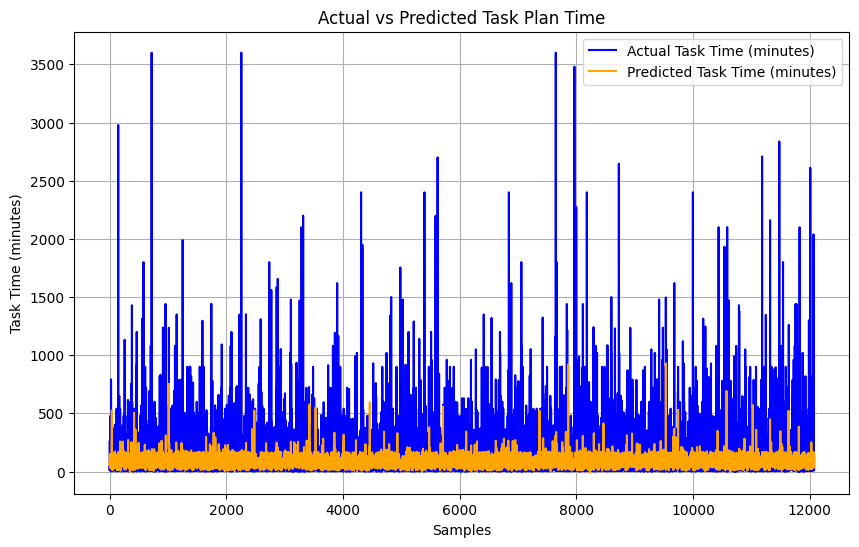

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Task Time for sample input: -81.56 minutes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_name = "CESAW_task_fact.csv"  # Replace with your dataset filename
data = pd.read_csv(file_name)

# Step 2: Preprocess the data
# Handle invalid or missing date values
data['task_actual_start_date'].replace("\\N", np.nan, inplace=True)
data['task_actual_complete_date'].replace("\\N", np.nan, inplace=True)

# Normalize the features (X) and target variable (y) using separate scalers
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

X_scaled = feature_scaler.fit_transform(X)
y_scaled = target_scaler.fit_transform(y.values.reshape(-1, 1))


# Convert to datetime format, handling errors
data['task_actual_start_date'] = pd.to_datetime(data['task_actual_start_date'], errors='coerce')
data['task_actual_complete_date'] = pd.to_datetime(data['task_actual_complete_date'], errors='coerce')

# Drop rows with missing or invalid dates
data.dropna(subset=['task_actual_start_date', 'task_actual_complete_date'], inplace=True)

# Convert dates to ordinal for sequence processing
data['task_actual_start_date'] = data['task_actual_start_date'].map(pd.Timestamp.toordinal)
data['task_actual_complete_date'] = data['task_actual_complete_date'].map(pd.Timestamp.toordinal)

# Select features and target variable
X = data[['task_actual_start_date', 'task_actual_complete_date']]  # Features
y = data['task_plan_time_minutes']  # Target variable

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Step 3: Build the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True),
    tf.keras.layers.LSTM(30, activation='relu', return_sequences=False),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 4: Reshape data for LSTM input
X_train_reshaped = np.expand_dims(X_train, axis=2)  # Add third dimension for LSTM
X_test_reshaped = np.expand_dims(X_test, axis=2)

# Step 5: Train the model
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)

# Step 6: Evaluate the model
loss = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"Test Loss (MSE): {loss}")

# Step 7: Predict and evaluate
y_pred = model.predict(X_test_reshaped)

# Reverse the scaling for better interpretability
y_test_original = scaler.inverse_transform(y_test)
y_pred_original = scaler.inverse_transform(y_pred)

# Step 8: Visualize the predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label="Actual Task Time (minutes)", color='blue')
plt.plot(y_pred_original, label="Predicted Task Time (minutes)", color='orange')
plt.title("Actual vs Predicted Task Plan Time")
plt.xlabel("Samples")
plt.ylabel("Task Time (minutes)")
plt.legend()
plt.grid(True)
plt.show()

# Step 9: Predict a sample input
sample_input = np.array([[738150, 738155]])  # Example task start and end dates in ordinal

# Use the feature scaler to transform the sample input
sample_input_scaled = feature_scaler.transform(sample_input)
sample_input_reshaped = np.expand_dims(sample_input_scaled, axis=2)

# Predict using the model
predicted_task_time_scaled = model.predict(sample_input_reshaped)

# Use the target scaler to inverse transform the predicted value
predicted_task_time = target_scaler.inverse_transform(predicted_task_time_scaled)
print(f"Predicted Task Time for sample input: {predicted_task_time[0][0]:.2f} minutes")

